/Users/tongya/anaconda3/envs/geo_scipy/lib/python3.6/site-packages/xarray/core/nanops.py:162: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


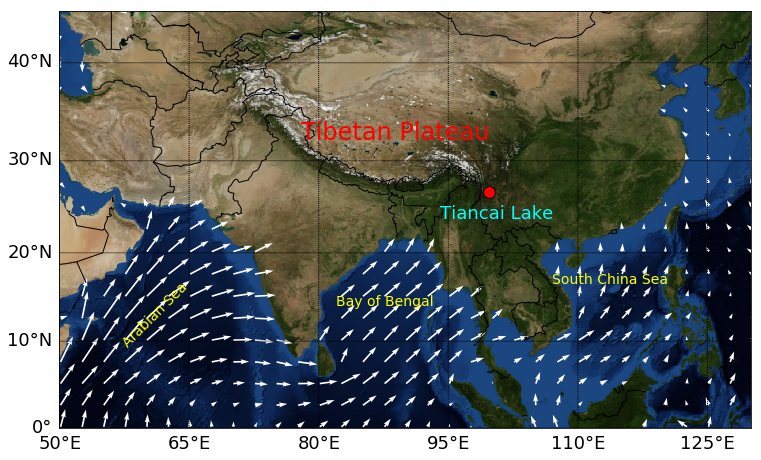

In [87]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

link = 'http://apdrc.soest.hawaii.edu:80/dods/public_data/satellite_product/QSCAT/qscat_clima'
ds = xr.open_dataset(link)

lon = ds.sel(lon=slice(40,140)).lon
lat = ds.sel(lat=slice(0,60)).lat

u = ds.sel(time=slice('2001-06-01','2001-08-01'), lon=slice(40,140), lat=slice(0,60)).u
u = u.mean(dim='time')
v = ds.sel(time=slice('2001-06-01','2001-08-01'), lon=slice(40,140), lat=slice(0,60)).v
v = v.mean(dim='time')
    
fig = plt.figure(figsize=(12,10))
ax = fig.add_axes([0.1,0.1,0.8,0.8])
m = Basemap(llcrnrlon=50,llcrnrlat=0,urcrnrlon=130,urcrnrlat=45,projection='mill',resolution='l')
#m.quiver(lon[::10], lat[::10], u[::10,::10], v[::10,::10],scale=130)
c1 = m.drawparallels(np.arange(0,50,10),labels=[1,0,0,0],fontsize=18)
c2 = m.drawmeridians(np.arange(50,130,15),labels=[0,0,0,1],fontsize=18)

x1, y1 = m(99.717, 26.633)
x2, y2 = m(97.517, 37.133)
x3, y3 = m(94.25, 38.867)


m.bluemarble()

m.drawcountries(color='k',linewidth=1)

m.scatter(x1, y1, 140, marker='o',color='red',edgecolor='k')
#m.scatter(x2, y2, 140, marker='*',color=(0, .6, .9),edgecolor='k')
#m.scatter(x3, y3, 140, marker='*',color=(0, .6, .9),edgecolor='k')

fig.text(0.38,0.61,'Tibetan Plateau',color='red',fontsize=24)
fig.text(0.17,0.40,'Arabian Sea',color='yellow',fontsize=14,rotation=45)
fig.text(0.42,0.38,'Bay of Bengal',color='yellow',fontsize=14)
fig.text(0.67,0.41,'South China Sea',color='yellow',fontsize=14)
fig.text(0.54,0.50,'Tiancai Lake',color='aqua',fontsize=18)
x, y = m(*np.meshgrid(lon,lat))
m.quiver(x[::10,::10], y[::10,::10], u[::10,::10], v[::10,::10],color='w')

plt.show()

#fig.savefig('xp_map.eps',dpi=300)
fig.savefig('xp_map.png',dpi=300)